In [289]:
using Plots, LaTeXStrings, Printf;


### Homotopy Example 
___

* In this notebook I will demonstrate a homotopy between two functions: $\sin\left( \pi x \right)$ and $8 x^2 (x^2 - 1)$.
* The goal is to create an animation showing the results as the _embdedding parameter_ $q$ goes from $0$ to $1$.

Let's get started!

In [290]:
f1(x) = sin(π * x)
f2(x) = (2 * x - 1) + 0.4 * sin(25 * x)
H(x, q) = (1 - q) * f1(x) + q * f2(x);


$(2 x - 1) + 0.4 \sin{(50 x)}$

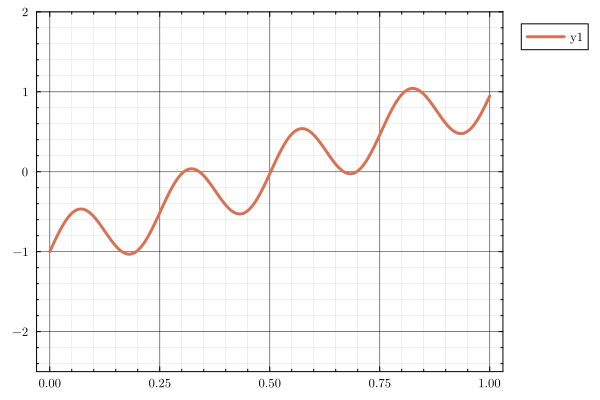

In [291]:
x = LinRange(0, 1, 1000)
plot(
    x, f2.(x),
    ylims = (
        -2.5, 2,
    ),
    lw = 3,
)


In [292]:
# Create the animation
function create_h_animation(;
        fps::Int = 30,
        num_frames::Int = 250,
        dpi::Int = 300
    )
    # Create x range
    eks = LinRange(0, 1, 1000)

    # Prepare q values for animation
    q_values = LinRange(0, 1, num_frames)

    # Temporary file for video
    filename = "homotopy_ex4.mp4"

    # Create the animation and save directly as MP4
    anim = @animate for q in q_values
        # Calculate H(x,q) for current q
        y = H.(eks, q)

        theme(:dao::Symbol)

        # Plot with fixed y-axis limits
        plot(
            eks, y,
            title = "Homotopy Animation",
            xlabel = L"$x$",
            ylabel = L"$H(x; q)$",
            label = L"$q =$ %$(round(q, digits = 2))",
            ylims = (-2.5, 2),
            linewidth = 3,
            legend = :best,
            titlefontsize = 20,
            tickfontsize = 12,
            legendfontsize = 10,
            yguidefontsize = 15,
            xguidefontsize = 15,
            line = (3, :solid),
            xlims = (0, 1),
            dpi = dpi
        )
        plot!(
            eks, [f1.(eks), f2.(eks)],
            labels = [L"$\sin(\pi x)$" L"$(2 x - 1) + 0.4 \sin{(50 x)}$"],
            line = (3, :dash),
            xlims = (0, 1),
            dpi = dpi
        )

    end
    # Save as high-quality MP4
    return mp4(
        anim, filename,
        fps = fps,

    )

end


create_h_animation (generic function with 1 method)

In [293]:
# Run the animation
create_h_animation()


[ Info: Saved animation to /home/belster/JuliaFiles/Aero/homotopy/homotopy_ex4.mp4


Plots.AnimatedGif("/home/belster/JuliaFiles/Aero/homotopy/homotopy_ex4.mp4")